In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc("font", family = "serif",size=20)
rc("figure",figsize=(9,6))
rc("figure",facecolor="white")
%config InlineBackend.figure_format = 'retina'
from sklearn.utils import shuffle
import seaborn as sns
from scipy.spatial.distance import cdist
from scipy.stats import pearsonr

%load_ext autoreload
%autoreload 2
from matching import *

In [2]:
indep,dep,true_df,matching_cols,exact_cols = gen_fake_data()

In [3]:
# indep.groupby(None)

In [4]:
small_indep = indep.drop(2)
small_indep

,match0,match1,match2,match3,country,gender,indep
94,-0.714759,-1.439370,-1.893247,1.315784,1.0,0.0,-0.245413
29,-0.338883,0.241772,-1.246108,-0.638447,0.0,1.0,-0.480273
60,0.528559,0.488588,-0.289488,-0.014093,1.0,0.0,0.322470
62,-0.315722,-0.769810,0.425724,0.540609,1.0,1.0,1.236339
39,0.080690,1.410013,-0.085764,1.247550,0.0,0.0,1.148639
33,0.924253,0.422651,-0.140069,-1.386672,1.0,1.0,2.045706
83,0.072405,-0.562472,-0.691685,-2.012018,2.0,1.0,-0.581826
26,-0.302370,-0.298651,0.151448,-0.931635,1.0,1.0,-1.781162
9,0.837960,-0.741077,1.059781,-1.472999,2.0,1.0,-0.002276
86,-0.668121,-0.414442,1.310129,1.196486,0.0,0.0,1.667742


In [5]:
def matching(indep,dep,matching_cols,exact_cols=None,metric = 'mahalanobis'):
    if exact_cols is None:
        print("not doing exact matching")
        return match_within_group(indep,dep,matching_cols,metric=metric)
    else:
        out = []
        indep_group = indep.groupby(exact_cols)
        dep_group = dep.groupby(exact_cols)
        for key in dep_group.groups.keys():
            dep_dat = dep.loc[dep_group.groups[key],:]
            indep_dat = indep.loc[indep_group.groups[key],:]
            out.append(match_within_group(indep_dat,dep_dat,matching_cols,metric=metric))
        
        #https://stackoverflow.com/questions/50501787/python-pandas-user-warning-sorting-because-non-concatenation-axis-is-not-aligne
        return pd.concat(out,sort=False)

In [6]:
small_dep = dep.drop(2)

In [7]:
out = matching(small_indep,dep,matching_cols,exact_cols=exact_cols)

In [8]:
def _match_within_group(x1,x2,metric='mahalanobis',VI=None,p=None):
    """
    returns the indexto match x2 to x1 and some other stuff
    """
    pairwise = cdist(x1,x2,metric=metric,VI=None,p=None)
    idx, dist = get_nearest(pairwise)
    #idx = idx[dist<cutoff] #for doing cutoffs
    
    return idx,dist,pairwise
()

TypeError: _match_within_group() missing 2 required positional arguments: 'x1' and 'x2'

In [14]:
np.setdiff1d(['a','b'],['b','c'])

array(['a'], dtype='<U1')

In [15]:
x1  = np.random.rand(9)
x2 = np.random.rand(10)

In [16]:
_match_within_group(x2[:,None],x1[:,None])[1]

array([0.01485943, 0.10670905, 0.18734215, 0.32356617, 0.21341949,
       0.07487423, 0.17251035, 0.10097579, 0.00144409, 0.34579926])

In [17]:
for i in out:
    print(i.columns)
    print(i.shape)

AttributeError: 'str' object has no attribute 'columns'

In [18]:
pd.concat(out,sort=False)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [19]:
out = matching(indep,dep,matching_cols,exact_cols=exact_cols)
for i in out:
    print(i.columns)
pd.concat(out).shape

AttributeError: 'str' object has no attribute 'columns'

In [20]:
matching(indep,small_dep,matching_cols,exact_cols=exact_cols)

,country,gender,dep,indep,dist
3,0.0,0.0,6.120401,1.752116,0.135058
5,0.0,0.0,0.723269,0.085581,0.976515
30,0.0,0.0,-2.140865,-0.444238,0.240653
31,0.0,0.0,4.431680,1.059583,0.592012
39,0.0,0.0,5.565060,1.148639,1.040367
42,0.0,0.0,-4.583654,-1.613983,0.259134
85,0.0,0.0,-1.392507,-0.238116,0.310494
86,0.0,0.0,5.190423,1.667742,0.268246
92,0.0,0.0,1.535044,0.614901,0.458212
96,0.0,0.0,-5.236114,-0.558599,0.160290


In [21]:
out = []
indep_group = indep.groupby(exact_cols)
dep_group = dep.groupby(exact_cols)
for key in dep_group.groups.keys():
    dep_dat = dep.loc[dep_group.groups[key],:]
    indep_dat = indep.loc[indep_group.groups[key],:]
    out.append(match_within_group(indep_dat,dep_dat,matching_cols,metric='mahalanobis'))

In [22]:
concat = pd.concat(out)
concat[exact_cols+['dep','indep']].groupby(exact_cols).mean() - true_df[exact_cols+['dep','indep']].groupby(exact_cols).mean()

dep     indep
country gender               
0.0     0.0     0.0  0.000000
        1.0     0.0  0.036097
1.0     0.0     0.0  0.000000
        1.0     0.0  0.000000
2.0     0.0     0.0 -0.039949
        1.0     0.0  0.095552

In [23]:
def do_cutoff(cutoff,dists):
    """
    cutoff : the cutoff distance to be used
    pairwise: pre computed pairwise distance
    
    returns
    -------
    (avg_dist, N_kept)
    """
    
    keep = dists<cutoff
    n_kept = keep.sum()
    if n_kept>0:
        avg_dist = dists[keep].mean()
    else:
        avg_dist = 0
    return avg_dist, n_kept


In [24]:
def frontier(distances,normalize=True,label=None):
    if normalize:
        dist = distances/distances.max()
    else:
        dist = distances
    cutoffs = np.linspace(dist.min(),dist.max(),100)
    avg_dist = np.zeros_like(cutoffs)
    kept = np.zeros_like(cutoffs)
    for i,c in enumerate(cutoffs):
        avg_dist[i],kept[i] = do_cutoff(c,dists)
    plt.scatter(len(dist)- kept,avg_dist,label=label)
    plt.ylabel('Average Dist')
    plt.xlabel('Number pruned')


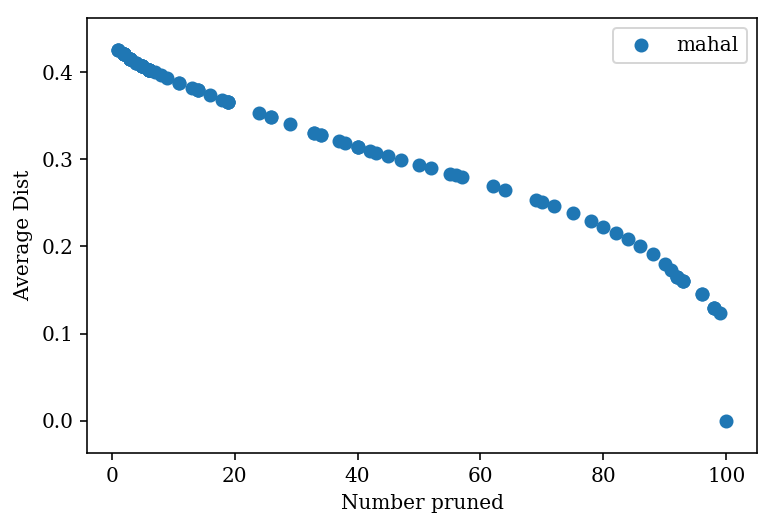

In [25]:
dists = concat['dist'].values
frontier(dists,normalize=True,label='mahal')
plt.legend()
plt.show()

# here is good stuff

In [35]:
def match_within_group_new(onto,source,matching_cols,metric='mahalanobis',VI=None,p=None):
    """
    matches the data from source and appends into the onto dataframe
    """
    onto_arr = onto[matching_cols].values
    onto_dat = onto.drop(matching_cols,axis=1)

    source_arr = source[matching_cols].values
    source_dat = source.drop(matching_cols,axis=1)
    
    pairwise = cdist(onto_arr,source_arr,metric=metric,VI=None,p=None)
    idx, dist = get_nearest(pairwise)
    
    new_cols = np.setdiff1d(source_dat.columns,onto_dat.columns)
    for i,v in enumerate(new_cols):
        onto_dat[new_cols[i]]=source_dat[v].values[idx]
    onto_dat['dist']=dist
    return onto_dat


In [29]:
out_new = []
indep_group = indep.groupby(exact_cols)
dep_group = dep.groupby(exact_cols)
for key in dep_group.groups.keys():
    dep_dat = dep.loc[dep_group.groups[key],:]
    indep_dat = indep.loc[indep_group.groups[key],:]
    out_new.append(match_within_group_new(indep_dat,dep_dat,matching_cols,metric='mahalanobis'))

In [31]:
old = pd.concat(out)

In [32]:
new = pd.concat(out_new)

,country,dep,dist,gender,indep
0,0.0,0.000000,5.551115e-17,0.0,0.000000
1,0.0,0.000000,1.110223e-16,0.0,0.000000
2,0.0,0.000000,5.551115e-17,0.0,0.000000
3,0.0,0.000000,-2.775558e-17,0.0,0.000000
4,0.0,0.000000,0.000000e+00,0.0,0.000000
5,0.0,0.000000,0.000000e+00,0.0,0.000000
6,0.0,0.000000,1.110223e-16,0.0,0.000000
7,0.0,0.000000,1.110223e-16,0.0,0.000000
8,0.0,0.000000,1.110223e-16,0.0,0.000000
9,0.0,0.000000,1.110223e-16,0.0,0.000000
